In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr,ttest_ind


In [31]:
import os

# Define directories
self_controlled_dir = "./Experiment-Data/Self-Controlled"
non_self_controlled_dir = "./Experiment-Data/Non-Self-Controlled"

# Initialize an empty list to hold data
data = []

# Process Self-Controlled directory
for filename in os.listdir(self_controlled_dir):
    if filename.endswith(".csv"):
        try:
            # Extract the Hunger index (Y value) from the filename
            hunger_part = filename.split("_")[1]
            # print(hunger_part)
            hours_last_meal = int(filename.split("_")[2][:-4])
            y_value = int(hunger_part[1:])  # Remove the 'H' and convert to integer
            if 1 <= y_value <= 10:  # Validate the range
                data.append({"Filename": filename, "Self-Controlled": 1, "Hunger_Index": y_value, "Hours_Last_Meal": hours_last_meal})
        except (ValueError, IndexError):
            print(f"Skipping invalid filename: {filename}")

# Process Non-Self-Controlled directory
for filename in os.listdir(non_self_controlled_dir):
    if filename.endswith(".csv"):
        try:
            # Extract the Hunger index (Y value) from the filename
            hunger_part = filename.split("_")[1]
            hours_last_meal = int(filename.split("_")[2][:-4])
            y_value = int(hunger_part[1:])  # Remove the 'H' and convert to integer
            if 1 <= y_value <= 10:  # Validate the range
                data.append({"Filename": filename, "Self-Controlled": 0, "Hunger_Index": y_value, "Hours_Last_Meal": hours_last_meal})
        except (ValueError, IndexError):
            print(f"Skipping invalid filename: {filename}")


# Create DataFrame
df = pd.DataFrame(data)
# Print the DataFrame
print(df)


            Filename  Self-Controlled  Hunger_Index  Hours_Last_Meal
0    data16_H9_4.csv                1             9                4
1     data2_H2_3.csv                1             2                3
2    data5_H8_12.csv                1             8               12
3     data6_H8_4.csv                1             8                4
4    data10_H2_1.csv                0             2                1
5    data11_H1_1.csv                0             1                1
6    data12_H2_1.csv                0             2                1
7   data13_H10_6.csv                0            10                6
8   data14_H8_10.csv                0             8               10
9    data15_H2_1.csv                0             2                1
10   data17_H1_1.csv                0             1                1
11   data18_H4_3.csv                0             4                3
12    data1_H9_6.csv                0             9                6
13    data3_H7_2.csv              

In [32]:
df.to_csv("output_dataframe.csv", index=False)

In [33]:
# Calculate Point Biserial Correlation
correlation, p_value = pointbiserialr(df["Self-Controlled"], df["Hunger_Index"])
corr_2, p_val_2 = pointbiserialr(df["Self-Controlled"], df["Hours_Last_Meal"])

# Output the results
print(f"Point Biserial Correlation: {correlation}, {corr_2}")
print(f"P-value: {p_value}, {p_val_2}")

if p_value < 0.05:
    print("The result is statistically significant, indicating a relationship between hunger index and self-control.")
else:
    print("The result is not statistically significant, suggesting no strong evidence of a relationship.")

Point Biserial Correlation: 0.30618621784789724, 0.3717161821406931
P-value: 0.21656084022349972, 0.1287944658161716
The result is not statistically significant, suggesting no strong evidence of a relationship.


In [37]:
corr_3, p_val_3 = pointbiserialr(df["Hunger_Index"], df["Hours_Last_Meal"])
print(corr_3, p_val_3)

0.6444554046521848 0.003888797317574701



Descriptive Statistics:
                 count  mean       std  min  25%  50%   75%   max
Self-Controlled                                                  
0                 14.0  4.50  3.057148  1.0  2.0  4.0  6.75  10.0
1                  4.0  6.75  3.201562  2.0  6.5  8.0  8.25   9.0

T-Test Results:
T-statistic: 1.2519175171312968, P-value: 0.2693681355599422


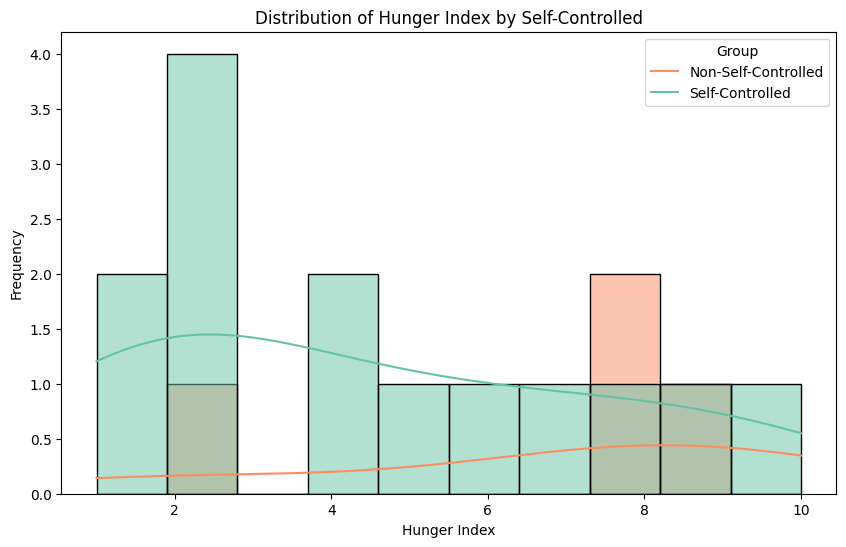

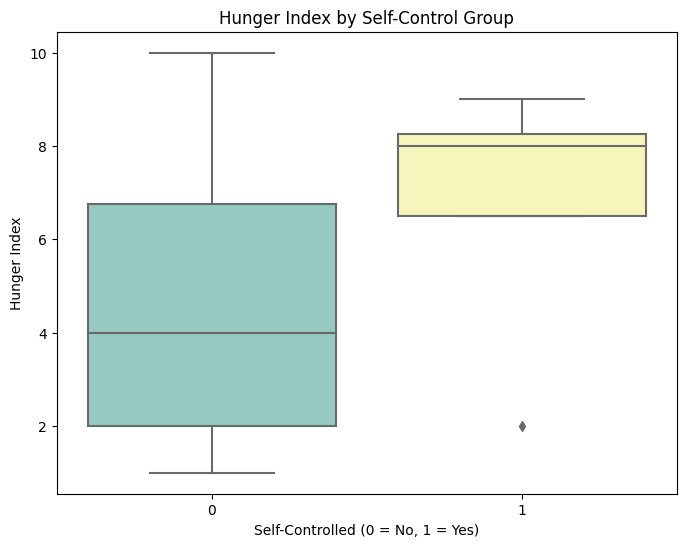

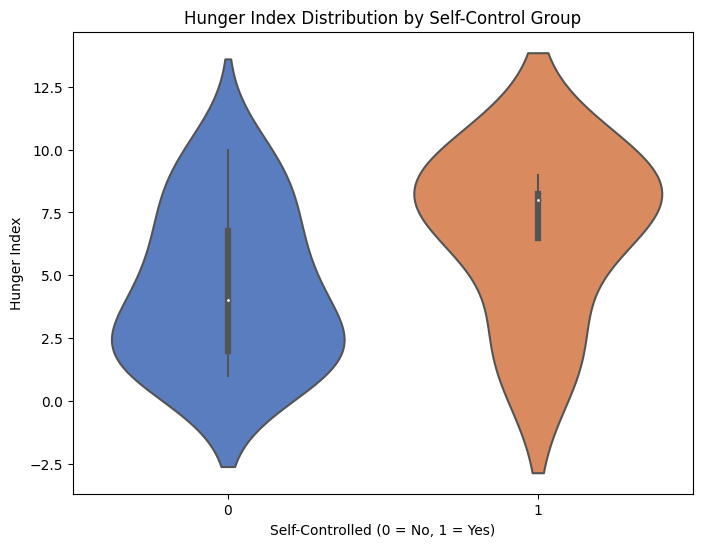

In [15]:
# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.groupby("Self-Controlled")["Hunger_Index"].describe())

# 3. Hypothesis Testing (t-test)
group_1 = df[df["Self-Controlled"] == 1]["Hunger_Index"]
group_0 = df[df["Self-Controlled"] == 0]["Hunger_Index"]
t_stat, t_p_value = ttest_ind(group_1, group_0, equal_var=False)  # Welch's t-test
print("\nT-Test Results:")
print(f"T-statistic: {t_stat}, P-value: {t_p_value}")

# 4. Visualizations

# 4.1 Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Hunger_Index", hue="Self-Controlled", kde=True, bins=10, palette="Set2")
plt.title("Distribution of Hunger Index by Self-Controlled")
plt.xlabel("Hunger Index")
plt.ylabel("Frequency")
plt.legend(["Non-Self-Controlled", "Self-Controlled"], title="Group")
plt.show()

# 4.2 Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Self-Controlled", y="Hunger_Index", data=df, palette="Set3")
plt.title("Hunger Index by Self-Control Group")
plt.xlabel("Self-Controlled (0 = No, 1 = Yes)")
plt.ylabel("Hunger Index")
plt.show()

# 4.3 Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Self-Controlled", y="Hunger_Index", data=df, palette="muted", split=True)
plt.title("Hunger Index Distribution by Self-Control Group")
plt.xlabel("Self-Controlled (0 = No, 1 = Yes)")
plt.ylabel("Hunger Index")
plt.show()



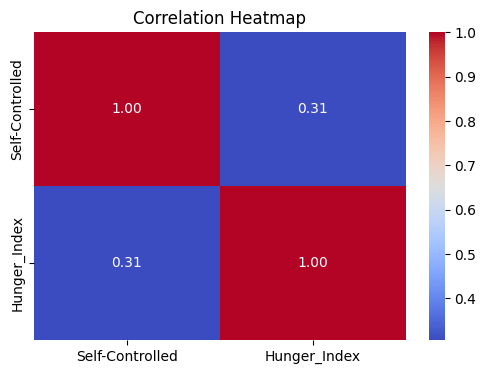

In [14]:
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if numeric_df.empty:
    print("No numeric columns available for correlation.")
else:
    # Plot correlation heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title("Correlation Heatmap")
    plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the DataFrame (use the one you already have)
# Assuming df contains "Self-Controlled" (binary target) and "Hunger_Index" (feature)

# Separate features (X) and target (y)
X = df[["Hunger_Index", "Hours_Last_Meal"]]  # Independent variable
y = df["Self-Controlled"]  # Dependent variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Get the coefficients and intercept
coefficient = log_reg.coef_[0]  # Since there's only one feature
intercept = log_reg.intercept_[0]

print(f"Coefficient (Hunger_Index): {coefficient}")
print(f"Intercept (Bias): {intercept}")

# Make predictions on the test set
y_pred = log_reg.predict(X)

# Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


Coefficient (Hunger_Index): [0.125799   0.18338349]
Intercept (Bias): -2.731729389352106
